In [46]:
#import dependencies
import pandas as pd 
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [47]:
src_file = Path.cwd() / '2.13. Practical example. Descriptive statistics_lesson.xlsx'

In [48]:
#read in data from excel file
sales_df = pd.read_excel(src_file, sheet_name = '365RE', usecols = 'A:AA')

In [49]:
#add column headers
sales_df.columns = sales_df.iloc[3]

In [50]:
#drop top excel styling rows
sales_df = sales_df.iloc[4:]

In [51]:
#view data
sales_df.head()

3,NaN,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
4,NaN,1030,1,2005,11,Apartment,30,743.086,246173,Sold,...,1986,6,21,F,USA,California,Home,5,No,Website
5,NaN,1029,1,2005,10,Apartment,29,756.213,246332,Sold,...,1983,2,24,F,USA,California,Home,5,No,Website
6,NaN,2002,2,2007,7,Apartment,2,587.281,209281,Sold,...,1985,12,27,M,USA,California,Home,1,Yes,Client
7,NaN,2031,2,2007,12,Apartment,31,1604.75,452667,Sold,...,1985,12,27,M,USA,California,Investment,3,Yes,Website
8,NaN,1049,1,2004,11,Apartment,49,1375.45,467083,Sold,...,1979,5,15,F,USA,California,Home,4,No,Agency


In [52]:
#view df columns
sales_df.columns

Index([                      nan,                      'ID',
                      'Building',            'Year of sale',
                 'Month of sale',        'Type of property',
                    'Property #',              'Area (ft.)',
                         'Price',                  'Status',
                             nan,             'Customer ID',
                        'Entity',                    'Name',
                       'Surname', 'Age at time of purchase',
                      'Interval',                       'Y',
                             'M',                       'D',
                        'Gender',                 'Country',
                         'State',                 'Purpose',
             'Deal satisfaction',                'Mortgage',
                        'Source'],
      dtype='object', name=3)

In [53]:
#frequency distribution by gender
sales_df.groupby('Gender')['Gender'].count()

Gender
F     70
M    108
Name: Gender, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

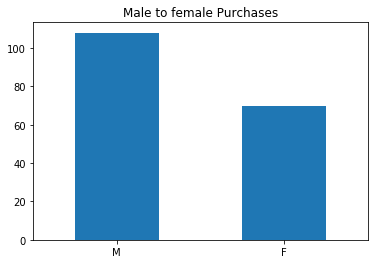

In [54]:
#visualize bar chart
sales_df['Gender'].value_counts().plot(kind='bar',title='Male to female Purchases')
plt.xticks(rotation=360)

In [55]:
#frequency distribution by state
sales_df.groupby('State')['State'].count()

State
Arizona        11
California    119
Colorado       11
Kansas          1
Nevada         17
Oregon         11
Utah            6
Virginia        4
Wyoming         1
Name: State, dtype: int64

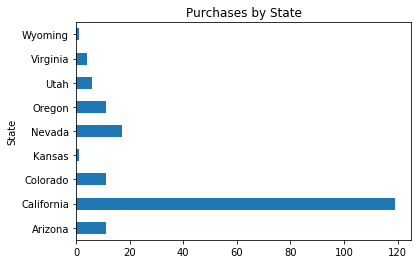

In [56]:
#visualize bar chart
sales_df.groupby('State')['State'].count().plot(kind='barh',title='Purchases by State')

In [57]:
sales_state = sales_df.groupby(['State']).size().reset_index(name='counts')
sales_state = sales_state.set_index('State').sort_values(by='counts',ascending=False)

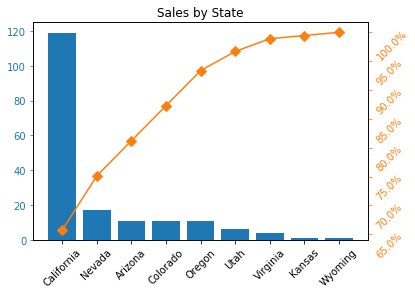

In [58]:
#make pareto diagram of sales by state
sales_state["cumpercentage"] = sales_state["counts"].cumsum()/sales_state["counts"].sum()*100

fig, ax = plt.subplots()
ax.bar(sales_state.index, sales_state["counts"], color="C0")
ax2 = ax.twinx()
ax2.plot(sales_state.index, sales_state["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="x", rotation=45)
ax2.tick_params(axis="y", colors="C1",rotation=45)
plt.title('Sales by State')
plt.show()


In [90]:
#create df of age interval counts
sales_age = sales_df.groupby('Interval')['Age at time of purchase'].count().reset_index(name='Age Counts')

In [91]:
sales_age

,Interval,Age Counts
0,18-25,5
1,26-35,36
2,36-45,52
3,46-55,41
4,56-65,26
5,65+,18


In [92]:
#create a frequency distribution by age
sales_age["Relative Frequency"] = (sales_age['Age Counts'] / sales_age['Age Counts'].sum())

In [93]:
#format relative frequency to percentages
sales_age = sales_age.style.format({
    'Relative Frequency':'{:,.2%}'.format
})

In [94]:
#view relative frequency of age distribution for purchases
sales_age

,Interval,Age Counts,Relative Frequency
0,18-25,5,2.81%
1,26-35,36,20.22%
2,36-45,52,29.21%
3,46-55,41,23.03%
4,56-65,26,14.61%
5,65+,18,10.11%


In [108]:
#convert style object back to dataframe
sales_age = sales_age.data

Text(0.5, 1.0, 'Age of Buyers Histogram')

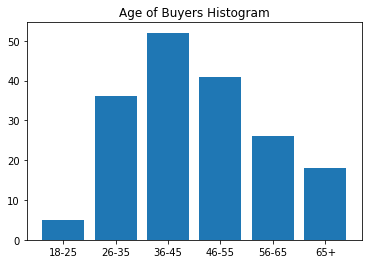

In [110]:
#plot age as histogram
plt.bar(sales_age['Interval'],sales_age['Age Counts'])
plt.title('Age of Buyers Histogram')